In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
data = load_digits()


In [3]:
x= data.data


In [4]:
y = data.target


In [5]:
from sklearn.neighbors import KNeighborsClassifier


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.35)


In [8]:
model = KNeighborsClassifier()


In [9]:
model.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
pre = model.predict(X_test)


In [11]:
df = pd.DataFrame({"Actual":Y_test,"Predicted":pre})


In [12]:
df.head()


,Actual,Predicted
0,0,0
1,3,3
2,1,1
3,3,3
4,7,7


In [13]:
model.score(X_test,Y_test)


0.9920508744038156

In [14]:
from sklearn import model_selection


In [15]:
kfold = model_selection.KFold(n_splits=10,random_state = 7)


In [16]:
res = model_selection.cross_val_score(model,x,y,cv = kfold,scoring ="accuracy")


In [17]:
res.sum()/10


0.9738485412787089

In [18]:
res2 =  model_selection.cross_val_score(model,x,y,cv = kfold,scoring ="neg_log_loss")


In [19]:
res2


array([-0.66831426, -0.02962516, -0.07148313, -0.06420906, -0.43955895,
       -0.03856648, -0.03964212, -0.0349096 , -0.25194677, -0.45336659])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pre,))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        55
          1       0.99      1.00      0.99        68
          2       0.98      1.00      0.99        58
          3       1.00      0.98      0.99        54
          4       1.00      1.00      1.00        66
          5       0.98      0.98      0.98        60
          6       0.99      1.00      0.99        68
          7       1.00      1.00      1.00        66
          8       0.98      0.98      0.98        58
          9       1.00      0.97      0.99        76

avg / total       0.99      0.99      0.99       629



In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pre))

[[55  0  0  0  0  0  0  0  0  0]
 [ 0 68  0  0  0  0  0  0  0  0]
 [ 0  0 58  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 66  0  0  0  0  0]
 [ 0  0  0  0  0 59  1  0  0  0]
 [ 0  0  0  0  0  0 68  0  0  0]
 [ 0  0  0  0  0  0  0 66  0  0]
 [ 0  1  0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  1  0  0  1 74]]


In [22]:
import seaborn as sns


In [23]:
import matplotlib.pyplot as plt


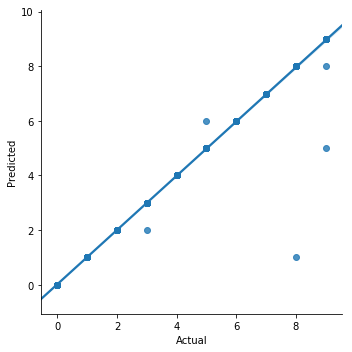

In [24]:
sns.lmplot("Actual",y = "Predicted",data = df)


In [25]:
Y = pd.DataFrame(y)


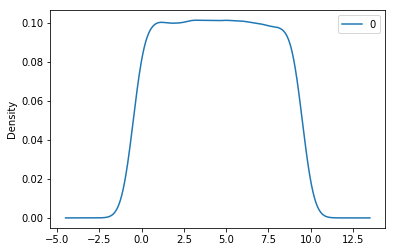

In [26]:
Y.plot(kind = "kde")
